<a href="https://www.kaggle.com/code/ranjeetkumbhar/te-it-ml-assignment-3-sppu?scriptVersionId=110390678" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Hello this is @Ranjeet_Kumbhar,<br>
Enjoy the Notebook<br>

GitHub: https://github.com/RanjeetKumbhar01/TE_IT_ML_ASSIGNMENTS_SPPU<br>
  
#  Question
Assignment on Classification technique
Every year many students give the GRE exam to get admission in foreign Universities. The data<br>
set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of 5),<br>
Statement of Purpose strength (out of 5), Letter of Recommendation strength (out of 5),<br>
Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes).<br>
Admitted is the target variable.<br>
Data Set Available on kaggle (The last column of the dataset needs to be changed to 0 or 1)Data<br>
Set : https://www.kaggle.com/mohansacharya/graduate-admissions<br>
The counselor of the firm is supposed check whether the student will get an admission or not<br>
based on his/her GRE score and Academic Score. So to help the counselor to take appropriate<br>
decisions build a machine learning model classifier using Decision tree to predict whether a<br>
student will get admission or not.<br>
Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if<br>
necessary.<br>
 Perform data-preparation (Train-Test Split)<br>
C. Apply Machine Learning Algorithm<br>
D. Evaluate Model.<br>



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

Drop " Serial No." no needed for classification

In [5]:
df = df.drop('Serial No.',axis=1)

In [6]:
df.shape

(500, 8)

In [7]:
from sklearn.preprocessing import Binarizer

In [8]:
bi = Binarizer(threshold=0.75)
df["Chance of Admit "] = bi.fit_transform(df[['Chance of Admit ']])

In [9]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,1.0
2,316,104,3,3.0,3.5,8.00,1,0.0
3,322,110,3,3.5,2.5,8.67,1,1.0
4,314,103,2,2.0,3.0,8.21,0,0.0


In [10]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]

y = df['Chance of Admit ']
y = y.astype('int') # y float is converted into y

<AxesSubplot:xlabel='Chance of Admit ', ylabel='count'>

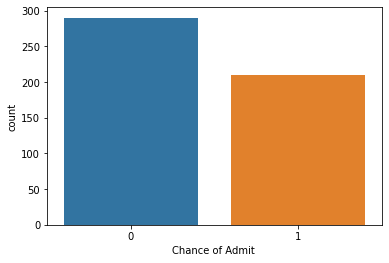

In [12]:
sns.countplot(x=y)

In [13]:
y.value_counts()

0    290
1    210
Name: Chance of Admit , dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [16]:
print(f"Size of splitted data")
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"y_train {x_test.shape}")
print(f"y_test {y_test.shape}")

Size of splitted data
x_train (375, 7)
y_train (375,)
y_train (125, 7)
y_test (125,)


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [18]:
model_dt = DecisionTreeRegressor(random_state=1)
model_rf = RandomForestRegressor(random_state=1)
model_lr = LogisticRegression(random_state=1,solver='lbfgs',max_iter=1000)

In [19]:
model_dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [20]:
model_rf.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [21]:
model_lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [22]:
y_pred_dt = model_dt.predict(x_test) #int
y_pred_rf = model_rf.predict(x_test) #float
y_pred_lr = model_lr.predict(x_test) #

In [23]:
y_pred_rf = y_pred_rf.reshape(1,-1)

In [24]:
y_pred_rf = bi.fit_transform(y_pred_rf)
y_pred_rf = y_pred_rf.reshape(125)

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

# Decision Tree

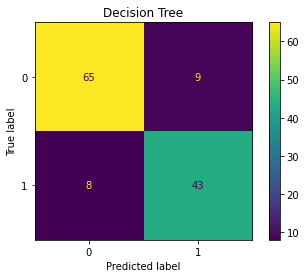

 Accuracy is 0.864
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        74
           1       0.83      0.84      0.83        51

    accuracy                           0.86       125
   macro avg       0.86      0.86      0.86       125
weighted avg       0.86      0.86      0.86       125



In [26]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt)
plt.title('Decision Tree')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_dt)}")
print(classification_report(y_test,y_pred_dt))

# Logistic Regression

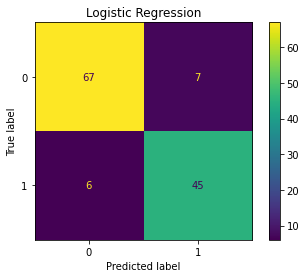

 Accuracy is 0.896
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        74
           1       0.87      0.88      0.87        51

    accuracy                           0.90       125
   macro avg       0.89      0.89      0.89       125
weighted avg       0.90      0.90      0.90       125



In [27]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr)
plt.title('Logistic Regression')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_lr)}")
print(classification_report(y_test,y_pred_lr))

# Random Forest

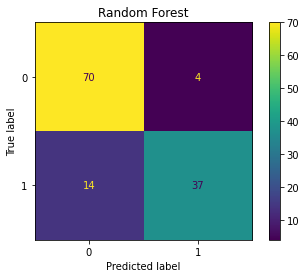

 Accuracy is 0.856
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        74
           1       0.90      0.73      0.80        51

    accuracy                           0.86       125
   macro avg       0.87      0.84      0.85       125
weighted avg       0.86      0.86      0.85       125



In [28]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf)
plt.title('Random Forest')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_rf)}")
print(classification_report(y_test,y_pred_rf))